In [3]:
import httpx
import os
from dotenv import load_dotenv

assert load_dotenv("api_keys")

client = httpx.Client()

In [10]:
import requests

In [35]:
def ask_openai_gpt(prompt):
    return requests.post("https://api.openai.com/v1/chat/completions",
            headers={
                "Content-Type": "application/json",
                "Authorization": f"Bearer {os.environ['OPENAI_API_KEY']}",
            },
            json={
                "messages": [
                    {
                        "role": "system",
                        "content": "You are a helpful assistant.",
                    },
                    {
                        "role": "user",
                        "content": prompt,
                    },
                ],
                "model": "gpt-3.5-turbo-16k",
                "temperature": 0.0,
                #"max_tokens": 4000, #max_new_tokens,
            },
        ).json()['choices'][0]['message']['content']

In [36]:
print(ask_openai_gpt("What is Ragna?"))

Ragna is a name that can have different meanings depending on the context. It can be a given name of Scandinavian origin, derived from the Old Norse name Ragnarr, meaning "warrior" or "judgment warrior." Ragna can also refer to Ragna the Bloodedge, a fictional character from the video game series BlazBlue, known for his powerful abilities and his quest for revenge. Additionally, Ragna can be a term used in astronomy to describe a hypothetical planet that could potentially collide with Earth in the future.


In [29]:
r.json()['choices'][0]['message']['content']

"Baseball is a popular sport played between two teams of nine players each. The objective of the game is to score more runs than the opposing team by hitting a ball with a bat and running around a series of bases. The team on offense takes turns batting and trying to score runs, while the team on defense tries to prevent them from scoring. Baseball is played on a diamond-shaped field with four bases: first base, second base, third base, and home plate. It is a widely followed sport in many countries, particularly in the United States, where it is often referred to as America's pastime."

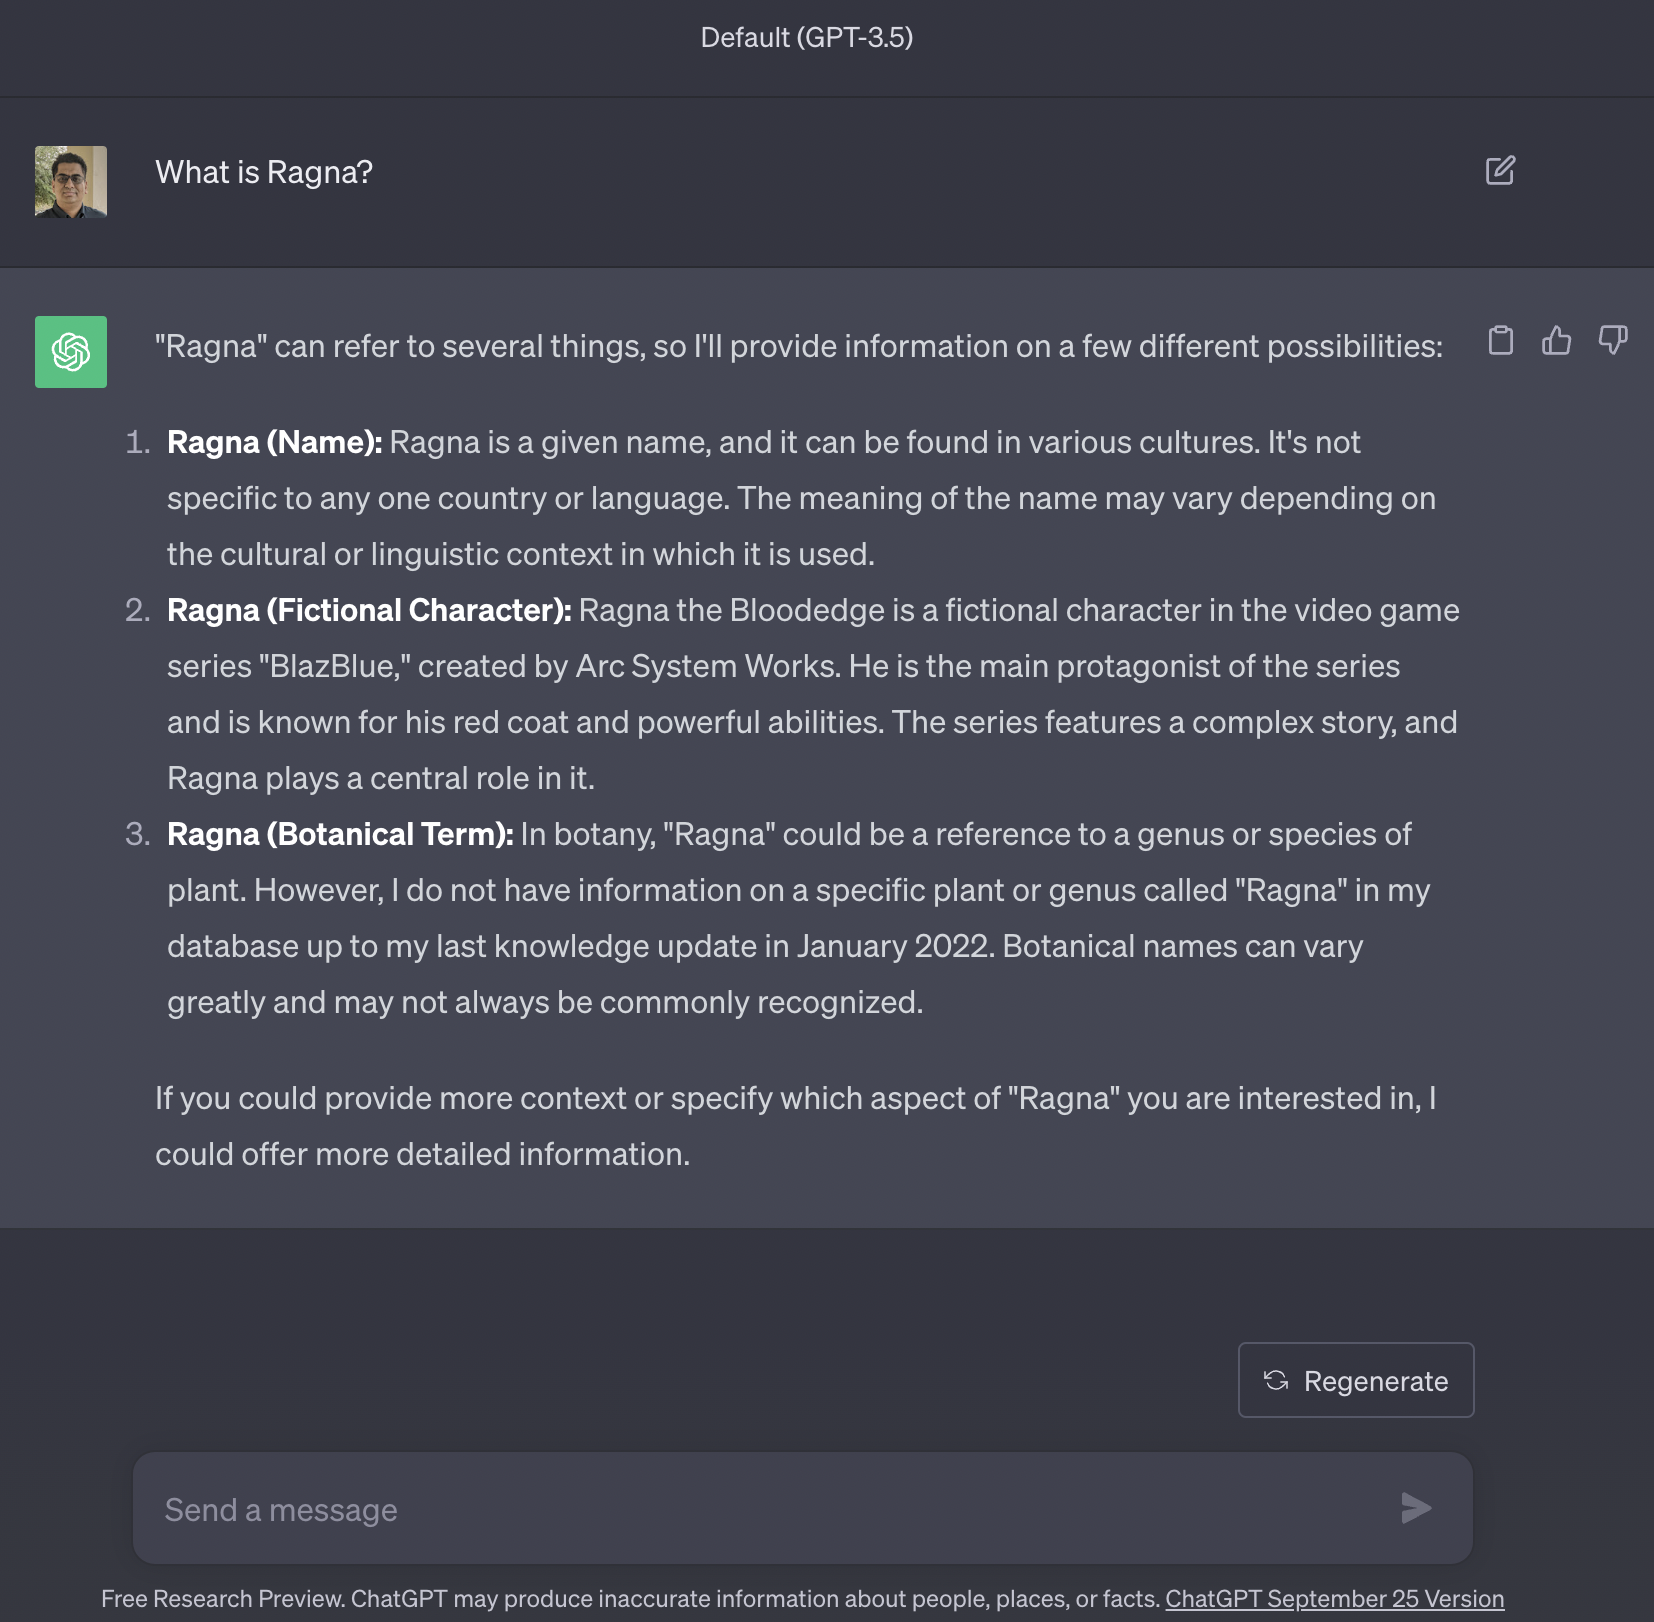

In [25]:
from IPython.display import Image
Image(filename='chatgpt-what-is-ragna.png') 

In [17]:
from pprint import pprint

In [22]:
ragna_description = "ragna.txt"

print(open(ragna_description, "r").read())

Ragna is a new open source project built by Quansight. It is designed to allow organizations to explore the power of Retrieval-augmented generation (RAG) based AI tools. Ragna provides an intuitive API for quick experimentation and built-in tools for creating production-ready applications allowing you to quickly leverage Large Language Models (LLMs) for your work.

At its core, Ragna is a plugin-based framework with a scalable queue based backend that provides:

 - Python API designed for experimentation that allows you to explore and test different LLMs, vector databases and embedding models quickly in Python.

- A REST API that allows you to build custom RAG-based web applications for your particular needs.

- A fully featured web application built with Panel (https://panel.holoviz.org) to select and configure LLMs, upload documents, and chat with the LLM. Designed for use as an out-of-the-box solution or as a reference to build custom web applications.

The Ragna website is https://

In [2]:
from dotenv import load_dotenv

assert load_dotenv("api_keys")

In [2]:
import ragna

ragna.__version__

'0.1.0'

In [3]:
from ragna import Config

config = Config()
config

Config(local_cache_root=PosixPath('/Users/dharhas/.cache/ragna'), core=CoreConfig(queue_url='memory', document=<class 'ragna.core.LocalDocument'>, source_storages=[<class 'ragna.source_storages.RagnaDemoSourceStorage'>], assistants=[<class 'ragna.assistants.RagnaDemoAssistant'>]), api=ApiConfig(url='http://127.0.0.1:31476', database_url='memory', authentication=<class 'ragna.core.RagnaDemoAuthentication'>, upload_token_secret='lAO-pqORtqHRXwRr166nvWBb_vda51gg', upload_token_ttl=300), ui=UiConfig(url='http://127.0.0.1:31477'))

In [4]:
from ragna.assistants import RagnaDemoAssistant
from ragna.core import Rag
from ragna.source_storages import RagnaDemoSourceStorage

In [5]:
document_path = "demo_document.txt"

with open(document_path, "w") as file:
    file.write("Ragna is an open-source RAG orchestration app\n")

In [37]:
rag = Rag(config)

async with rag.chat(
    documents=[document_path],
    source_storage=RagnaDemoSourceStorage,
    assistant=RagnaDemoAssistant,
) as chat:
    prompt = "What is Ragna?"
    answer = await chat.answer(prompt)

print(answer)

NameError: name 'Rag' is not defined

In [8]:
chat = rag.chat(
    documents=[document_path],
    source_storage=RagnaDemoSourceStorage,
    assistant=RagnaDemoAssistant,
)

In [9]:
await chat.prepare()

Message(content='How can I help you with the documents?', role=<MessageRole.SYSTEM: 'system'>, sources=[])

In [11]:
answer = await chat.answer(prompt)

In [12]:
print(answer.content)

I can't really help you with your prompt:

> What is Ragna?

I can at least show you the sources that I was given:

- demo_document.txt: Ragna is an open-source RAG orchestration app


In [15]:
from ragna.assistants import Gpt4, Gpt35Turbo16k
from ragna.source_storages import Chroma, LanceDB

In [16]:
async with rag.chat(
    documents=[document_path],
    source_storage=RagnaDemoSourceStorage,
    assistant=Gpt35Turbo16k,
) as chat:
    prompt = "What is Ragna?"
    answer = await chat.answer(prompt)

print(answer)

Ragna is an open-source RAG (Response Analysis Graph) orchestration app. It is designed to help developers build conversational AI applications by providing a framework for managing and orchestrating multiple AI models and services. Ragna allows developers to define conversational flows, handle user inputs, and integrate with various AI services to generate responses. It aims to simplify the development process and enable the creation of more sophisticated and dynamic conversational experiences.


In [19]:
answer.sources[0].content

'Ragna is an open-source RAG orchestration app'

In [24]:
async with rag.chat(
    documents=[ragna_description],
    source_storage=Chroma,
    assistant=Gpt35Turbo16k,
) as chat:
    prompt = "What is Ragna?"
    answer = await chat.answer(prompt)

print(answer)

Ragna is an open source project developed by Quansight. It is a plugin-based framework that allows organizations to explore the power of Retrieval-augmented generation (RAG) based AI tools. Ragna provides an intuitive Python API for experimentation with different Large Language Models (LLMs), vector databases, and embedding models. It also offers a REST API for building custom RAG-based web applications and a fully featured web application for selecting and configuring LLMs, uploading documents, and interacting with the LLM through chat. Ragna is designed to be used as an out-of-the-box solution or as a reference for building custom web applications. The project's website is https://ragna.chat/ and its source code is available on GitHub at https://github.com/Quansight/ragna. Ragna is licensed under the BSD 3-Clause license.


In [39]:
sec_10k_documents = [
    "files/ford-10k-2022.pdf",
    "files/gm-10k-2022.pdf",
    "files/tesla-10k-2022.pdf",
]

In [ ]:
chat = rag.chat(documents=sec_10k_documents, 
                source_storage=Chroma,
                assistant=Gpt35Turbo16k,
               )